In [1]:
import pandas as pd
import analysis_util
import matplotlib.pyplot as plt

In [2]:
# data_folder = "/Users/heleno/Documents/data"
data_folder = "C:\\Users\\HelenoCampos\\Documents\\data"
all_chunks_attributes = pd.read_csv(f'{data_folder}/dataset_attributes.csv')

In [3]:
all_chunks_attributes.head(5)

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,...,Same devs,Devs intersection,Commits 1,Commits 2,Changed files 1,Changed files 2,Changed files intersection,self_conflict_perc,has_branch_merge_message_indicator,has_multiple_devs_on_each_side
0,776661,Version 1,94,98,96,If statement,https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,...,0.0,0.0,1.0,59.0,3.0,281.0,1.0,0.0,0.0,0.0
1,776662,Combination,80,100,87,"If statement, Method invocation, Return statem...",https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,...,0.0,0.0,2.0,16.0,8.0,118.0,1.0,0.5,1.0,0.0
2,776697,Version 2,70,132,131,"Attribute, Method invocation",https://github.com/bndtools/bndtools,bndtools/bndtools,bndtools,bndtools,...,0.0,0.0,1.0,121.0,1.0,243.0,1.0,NaN,0.0,0.0
3,776700,Version 1,304,354,322,"Comment, For statement, If statement, Method i...",https://github.com/bndtools/bndtools,bndtools/bndtools,bndtools,bndtools,...,1.0,1.0,12.0,7.0,113.0,62.0,1.0,1.0,0.0,0.0
4,776710,Version 2,125,131,128,Method invocation,https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,2.0,1.0,51.0,6.0,293.0,5.0,1.0,1.0,1.0,1.0


In [4]:
df = pd.read_csv(f'{data_folder}/resolution_composition.csv')
print(len(df))
df.head()

13573


,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0


In [5]:
df_po = pd.read_csv(f'{data_folder}/partial_order_result.csv')
df = pd.merge(df, df_po, on='chunk_id', how='inner', suffixes=('', ''))
df.head()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0,True,18,12
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0,True,113,101
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0,True,6,5
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0,True,5,3
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0,True,6,5


In [6]:
malformed_chunks = pd.read_csv(f'{data_folder}/malformed_chunks.csv')
malformed_chunks = malformed_chunks['chunk_id'].unique()
print(f'Removing {len(malformed_chunks)} malformed chunks')
df = df[~df['chunk_id'].isin(malformed_chunks)]
print(f'Total number of chunks: {len(df)}')

Removing 264 malformed chunks
Total number of chunks: 13309


In [7]:
# remove imprecise resolutions
df = df[df['v1_percentage']!= -1]
print(len(df))

10726


In [8]:
# remove implicit forks
df = analysis_util.filter_implicit_forks(df)
print(f'New total number of chunks: {len(df)}')

Total projects:  1082
Filtered 6 of 1082 projects for being implicit forks: {'RealVNC/android-frameworks-base-with-screenshot-tweaks', 'AOKP/frameworks_base_disabled', 'cgjones/android-frameworks-base', 'allwinner-ics/platform_frameworks_base', 'adetaylor/android-frameworks-base-with-remote-control-service', 'IceColdSandwich/android_frameworks_base'}
Total valid projects:  1076
New total number of chunks: 10177


In [9]:
df.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,1.017700e+04,10177.00000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.00000,10177.000000,10177.000000,10177.000000,10177.000000
mean,1.097355e+06,0.55345,0.533306,0.510045,0.489930,0.086609,1.823622,2.175789,32.502489,36.404496,6.79493,6.965216,0.170286,15.298418,8.516164
std,2.119343e+05,0.31901,0.320762,0.304105,0.304072,0.198059,6.835704,10.463504,29.994432,30.863874,30.51060,33.251309,20.674248,68.754593,36.407157
min,7.766620e+05,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-388.000000,2.000000,1.000000
25%,9.398230e+05,0.33000,0.330000,0.330000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,2.000000,-2.000000,4.000000,2.000000
50%,1.064856e+06,0.50000,0.500000,0.500000,0.500000,0.000000,1.000000,1.000000,33.330000,40.000000,2.00000,3.000000,0.000000,6.000000,3.000000
75%,1.258354e+06,0.81000,0.800000,0.700000,0.670000,0.000000,1.000000,2.000000,50.000000,50.000000,5.00000,5.000000,2.000000,12.000000,7.000000
max,1.658666e+06,1.00000,1.000000,1.000000,1.000000,1.000000,353.000000,689.000000,100.000000,100.000000,1352.00000,1402.000000,1401.000000,2922.000000,1557.000000


In [10]:
all_attributes_selected = all_chunks_attributes[all_chunks_attributes['chunk_id'].isin(list(df['chunk_id']))]
all_attributes_selected

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,...,Same devs,Devs intersection,Commits 1,Commits 2,Changed files 1,Changed files 2,Changed files intersection,self_conflict_perc,has_branch_merge_message_indicator,has_multiple_devs_on_each_side
1,776662,Combination,80,100,87,"If statement, Method invocation, Return statem...",https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,...,0.0,0.0,2.0,16.0,8.0,118.0,1.0,0.5,1.0,0.0
15,776782,Combination,77,193,123,"Attribute, Comment, If statement, Method decla...",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,1.0,1.0,9.0,17.0,162.0,60.0,1.0,1.0,1.0,1.0
16,776793,Combination,914,922,920,"Attribute, Method invocation",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,1.0,1.0,9.0,17.0,162.0,60.0,1.0,1.0,1.0,1.0
22,776828,Combination,295,302,299,Method invocation,https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,2.0,1.0,179.0,18.0,823.0,35.0,1.0,0.5,1.0,1.0
48,776863,Combination,136,144,138,"Method signature, Static initializer",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,2.0,1.0,142.0,27.0,777.0,632.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173521,1652324,Combination,275,280,277,"Method signature, Try statement",https://github.com/gronnbeck/java-cluster-api,gronnbeck/java-cluster-api,gronnbeck,java-cluster-api,...,0.0,0.0,3.0,3.0,39.0,7.0,1.0,0.0,0.0,0.0
173524,1652325,Combination,85,91,88,"If statement, Variable",https://github.com/gronnbeck/java-cluster-api,gronnbeck/java-cluster-api,gronnbeck,java-cluster-api,...,0.0,0.0,3.0,3.0,39.0,7.0,1.0,0.0,0.0,0.0
175600,1658634,Combination,47,62,56,Attribute,https://github.com/xargsgrep/PortKnocker,xargsgrep/PortKnocker,xargsgrep,PortKnocker,...,1.0,2.0,1.0,1.0,412.0,44.0,1.0,1.0,1.0,0.0
175687,1658665,Combination,9,15,12,Attribute,https://github.com/mseiwert/RoM,mseiwert/RoM,mseiwert,RoM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
kinds_conflict = []
for index, row in df.iterrows():
    chunk_id = row['chunk_id']
    kind_conflict = all_attributes_selected[all_attributes_selected['chunk_id']==chunk_id].iloc[0]['kind_conflict']
    kinds_conflict.append(kind_conflict)
df['kind_conflict'] = kinds_conflict
df

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size,kind_conflict
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0,True,18,12,"If statement, Method invocation, Return statem..."
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0,True,113,101,"Attribute, Comment, If statement, Method decla..."
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0,True,6,5,"Attribute, Method invocation"
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0,True,5,3,Method invocation
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0,True,6,5,"Method signature, Static initializer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13432,1652324,0.50,0.50,0.50,0.50,0.00,v1 v2,0,1,0.00,50.00,1,2,1.0,True,3,2,"Method signature, Try statement"
13433,1652325,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0,True,4,2,"If statement, Variable"
13566,1658634,0.71,0.71,0.50,0.50,0.43,v2 (v1_2) v1 (v1_2) v2,2,0,28.57,0.00,7,5,-2.0,True,13,7,Attribute
13567,1658665,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0,True,4,3,Attribute


In [12]:
df_new = pd.read_excel('resolution_constructs.xlsx')
df_new.rename(columns={'Language constructs': 'resolution_constructs'}, inplace=True)
df_new

,Carimbo de data/hora,chunk_id,Resolution text,resolution_constructs
0,2023-06-21 16:21:03.151,777948,"b2.do_normal_white_move('h','2','h','4...","Assert statement, Comment, Method invocation"
1,2023-06-21 16:26:39.396,781756,import java.util.Set;\n\npublic interface Bina...,"Attribute, Comment, Import, Interface signatur..."
2,2023-06-21 16:28:02.095,797447,}\n\n\n@Override\npublic boolean isTotalFinali...,"Annotation, If statement, Method signature"
3,2023-06-21 16:28:28.376,782705,\n ModuleVersionArtifactMetaData artifact(A...,Method interface
4,2023-06-21 16:28:41.701,804832,import java.util.List;\nimport java.util.Map;\...,Import
...,...,...,...,...
161,2023-06-29 17:30:14.761,1602567,private static final int STOP_PLAYING_DELAY = ...,"Attribute, Comment, Method invocation"
162,2023-06-29 17:31:09.901,1610560,// then something went wrong trying to c...,"Comment, Method invocation, Return statement"
163,2023-06-29 17:31:18.701,1111021,import com.ch_linghu.fanfoudroid.StatusActivit...,Import
164,2023-06-29 17:31:56.627,1426857,import org.sagebionetworks.utils.MD5ChecksumHe...,"Attribute, Class signature, Comment, Import"


In [13]:
df_dataset = df.copy()
df = pd.merge(df, df_new, on='chunk_id', how='inner', suffixes=('', ''))
df.head(5)

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,...,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size,kind_conflict,Carimbo de data/hora,Resolution text,resolution_constructs
0,776948,0.74,0.87,0.43,0.57,0.61,v1 (v1_2) v1 (v1_2) v1 (v1_2) v1 (v1_2) v1 (v...,0,1,0.00,...,13,26,13.0,True,45,44,"Method declaration, Method signature",2023-06-28 16:51:26.263,}\n }\n\n public static <R> R return...,"Method declaration, Method signature, Try stat..."
1,777948,0.00,1.00,0.00,1.00,0.00,v2,1,1,100.00,...,1,2,1.0,True,3,1,"Assert statement, Comment",2023-06-21 16:21:03.151,"b2.do_normal_white_move('h','2','h','4...","Assert statement, Comment, Method invocation"
2,778595,0.29,0.86,0.21,0.79,0.14,v2 (v1_2) v1 v2,4,1,66.67,...,6,7,1.0,True,13,7,"Attribute, If statement, Method invocation, Re...",2023-06-28 17:29:48.722,\n public static boolean refreshDeckStatist...,Method declaration
3,779647,0.67,0.33,0.67,0.33,0.00,v1 v2 v1,0,2,0.00,...,2,3,1.0,True,5,3,"Attribute, Method invocation",2023-06-28 17:30:22.402,for (Field f : getFields()) {\n ...,"For statement, Method invocation"
4,779688,1.00,0.00,1.00,0.00,0.00,v1,1,1,50.00,...,2,1,-1.0,True,3,1,"Method invocation, Variable",2023-06-28 17:31:00.974,Cursor cursor = null;\n\n try {...,"Comment, Method invocation, Try statement, Var..."


In [14]:
df.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,1.660000e+02,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,1.115454e+06,0.567952,0.535723,0.515843,0.484157,0.103373,1.433735,1.765060,32.150663,37.517108,4.933735,5.506024,0.572289,11.620482,7.096386
std,2.119402e+05,0.302075,0.315036,0.290969,0.290969,0.207153,2.107377,2.607492,29.181130,30.395041,6.041408,8.513623,9.131574,13.336005,9.716109
min,7.769480e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.000000,2.000000,1.000000
25%,9.614592e+05,0.500000,0.330000,0.330000,0.330000,0.000000,0.000000,1.000000,0.000000,3.012500,2.000000,2.000000,-1.000000,4.000000,2.000000
50%,1.079062e+06,0.500000,0.500000,0.500000,0.500000,0.000000,1.000000,1.000000,33.330000,50.000000,3.000000,3.000000,0.000000,7.000000,3.000000
75%,1.299988e+06,0.800000,0.830000,0.670000,0.670000,0.080000,1.000000,2.000000,50.000000,50.000000,6.000000,6.000000,2.000000,13.750000,8.000000
max,1.610560e+06,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,20.000000,100.000000,100.000000,38.000000,76.000000,76.000000,90.000000,70.000000


### How many of the resolutions in our dataset have just imports?

In [15]:
import_resolutions = df[df['resolution_constructs']=='Import'].copy()
import_resolutions

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,...,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size,kind_conflict,Carimbo de data/hora,Resolution text,resolution_constructs
14,804832,0.00,1.00,0.00,1.00,0.00,v2,0,1,0.00,...,0,3,3.0,True,3,2,Import,2023-06-21 16:28:41.701,import java.util.List;\nimport java.util.Map;\...,Import
17,822817,0.67,0.33,0.67,0.33,0.00,v1 v2,1,1,33.33,...,3,2,-1.0,True,5,3,Import,2023-06-28 18:12:00.886,import ro.isdc.wro.model.factory.WroModelFacto...,Import
19,926704,0.71,0.57,0.57,0.43,0.29,v1 v2 (v1_2) v1 v2 (v1_2) v1,0,4,0.00,...,5,8,3.0,True,13,7,Import,2023-06-28 18:12:46.690,\nimport com.google.inject.Inject;\nimport com...,Import
22,933301,0.67,0.67,0.50,0.50,0.33,v2 (v1_2) v1,1,1,33.33,...,3,3,0.0,True,6,3,Import,2023-06-21 16:30:24.611,import org.graylog2.rest.helpers.OutputFilter;...,Import
25,933461,0.50,0.50,0.50,0.50,0.00,v1 v2,0,1,0.00,...,1,2,1.0,True,3,2,Import,2023-06-21 16:30:35.602,import org.graylog2.rest.resources.users.respo...,Import
26,935180,0.17,0.83,0.17,0.83,0.00,v1 v2,1,0,50.00,...,2,5,3.0,True,7,6,Import,2023-06-28 18:14:20.289,import org.elasticsearch.index.mapper.internal...,Import
32,939086,0.33,0.67,0.33,0.67,0.00,v1 v2,1,0,50.00,...,2,2,0.0,True,4,3,Import,2023-06-28 19:26:37.231,import org.elasticsearch.common.component.Abst...,Import
42,962903,0.50,0.50,0.50,0.50,0.00,v1 v2,0,1,0.00,...,1,2,1.0,True,3,2,Import,2023-06-26 19:53:13.174,import org.atlasapi.media.entity.MediaType;\ni...,Import
44,967351,1.00,0.00,1.00,0.00,0.00,v1,1,1,50.00,...,2,1,-1.0,True,3,1,Import,2023-06-28 19:30:01.215,import android.app.*;\nimport android.content....,Import
50,976654,1.00,0.00,1.00,0.00,0.00,v1,2,2,66.67,...,3,2,-1.0,True,7,1,Import,2023-06-26 20:08:38.056,import org.hibernate.internal.util.config.Conf...,Import


In [16]:
import_resolutions.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,1.072058e+06,0.601818,0.440455,0.580909,0.419091,0.041818,0.772727,0.863636,32.726818,32.057273,2.318182,2.909091,0.590909,5.590909,3.500000
std,1.887818e+05,0.309002,0.306974,0.303925,0.303925,0.102243,0.528413,0.990212,22.599476,33.473878,1.170525,3.998918,3.825467,5.234129,4.405084
min,8.048320e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,2.000000,1.000000
25%,9.361565e+05,0.500000,0.250000,0.500000,0.152500,0.000000,0.250000,0.000000,5.000000,0.000000,2.000000,1.000000,-1.000000,3.000000,2.000000
50%,1.011518e+06,0.500000,0.500000,0.500000,0.500000,0.000000,1.000000,1.000000,41.665000,33.330000,2.000000,2.000000,-0.500000,3.500000,2.000000
75%,1.150245e+06,0.937500,0.645000,0.847500,0.500000,0.000000,1.000000,1.000000,50.000000,50.000000,3.000000,3.000000,1.000000,6.750000,3.000000
max,1.431318e+06,1.000000,1.000000,1.000000,1.000000,0.330000,2.000000,4.000000,66.670000,100.000000,5.000000,19.000000,16.000000,26.000000,22.000000


In [17]:
print(f'{(len(import_resolutions)/len(df))*100}%')

13.253012048192772%


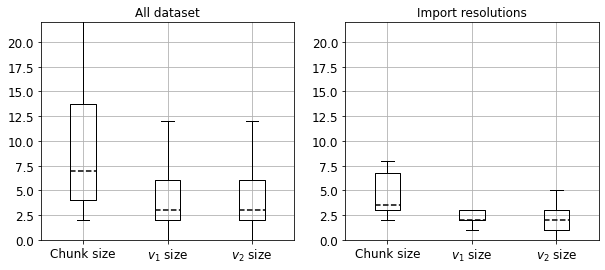

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df.boxplot(['chunk_size', 'v1_size', 'v2_size'], showfliers=False, ax=ax[0], color = 'k', medianprops=dict(linestyle='--', linewidth=1.5, color='k'))
ax[0].tick_params(axis="x", labelsize=12)
ax[0].tick_params(axis="y", labelsize=12)
ax[0].set_ylim(0, 22)
ax[0].set_xticklabels(['Chunk size', '$v_{1}$ size', '$v_{2}$ size'])
ax[0].set_title('All dataset')

import_resolutions.boxplot(['chunk_size', 'v1_size', 'v2_size'], showfliers=False, ax=ax[1], color = 'k', medianprops=dict(linestyle='--', linewidth=1.5, color='k'))
ax[1].tick_params(axis="x", labelsize=12)
ax[1].tick_params(axis="y", labelsize=12)
ax[1].set_ylim(0, 22)
ax[1].set_xticklabels(['Chunk size', '$v_{1}$ size', '$v_{2}$ size'])
ax[1].set_title('Import resolutions')

plt.show()

### What about the remaining chunks? What is the distribution of their kind?

In [19]:
not_import_resolutions = df[df['resolution_constructs']!='Import']
not_import_resolutions

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,...,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size,kind_conflict,Carimbo de data/hora,Resolution text,resolution_constructs
0,776948,0.74,0.87,0.43,0.57,0.61,v1 (v1_2) v1 (v1_2) v1 (v1_2) v1 (v1_2) v1 (v...,0,1,0.00,...,13,26,13.0,True,45,44,"Method declaration, Method signature",2023-06-28 16:51:26.263,}\n }\n\n public static <R> R return...,"Method declaration, Method signature, Try stat..."
1,777948,0.00,1.00,0.00,1.00,0.00,v2,1,1,100.00,...,1,2,1.0,True,3,1,"Assert statement, Comment",2023-06-21 16:21:03.151,"b2.do_normal_white_move('h','2','h','4...","Assert statement, Comment, Method invocation"
2,778595,0.29,0.86,0.21,0.79,0.14,v2 (v1_2) v1 v2,4,1,66.67,...,6,7,1.0,True,13,7,"Attribute, If statement, Method invocation, Re...",2023-06-28 17:29:48.722,\n public static boolean refreshDeckStatist...,Method declaration
3,779647,0.67,0.33,0.67,0.33,0.00,v1 v2 v1,0,2,0.00,...,2,3,1.0,True,5,3,"Attribute, Method invocation",2023-06-28 17:30:22.402,for (Field f : getFields()) {\n ...,"For statement, Method invocation"
4,779688,1.00,0.00,1.00,0.00,0.00,v1,1,1,50.00,...,2,1,-1.0,True,3,1,"Method invocation, Variable",2023-06-28 17:31:00.974,Cursor cursor = null;\n\n try {...,"Comment, Method invocation, Try statement, Var..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,1601472,0.64,0.91,0.36,0.64,0.55,v2 (v1_2) v2 v1 (v1_2) v1 (v1_2) v1 v2 (v1_2) v2,0,4,0.00,...,7,14,7.0,True,23,12,"Method invocation, Synchronized statement, Var...",2023-06-29 17:25:29.871,final ProcessWrapperImpl pw = new ProcessWrapp...,"Comment, Method invocation, Synchronized state..."
162,1601558,0.67,0.67,0.50,0.50,0.33,v1 v2 (v1_2) v1 (v1_2) v1,0,0,0.00,...,7,7,0.0,True,15,12,"If statement, Method invocation, Try statement",2023-06-29 17:29:12.819,public void quit() {\nWindowsNamedPipe.setLoop...,"Catch clause, Method invocation, Method signat..."
163,1602651,1.00,0.00,1.00,0.00,0.00,v1,1,1,50.00,...,2,1,-1.0,True,3,1,"Attribute, Method invocation",2023-06-29 17:29:44.786,"private String debug_log, dbg_zip;\n\npublic D...","Attribute, Method invocation, Method signature..."
164,1602567,0.50,0.50,0.50,0.50,0.00,v1 v2,1,1,50.00,...,2,2,0.0,True,4,2,"Attribute, Comment, Method invocation",2023-06-29 17:30:14.761,private static final int STOP_PLAYING_DELAY = ...,"Attribute, Comment, Method invocation"


In [20]:
df['resolution_constructs'].value_counts(normalize=True).head(20)

Import                                                                        0.132530
Method invocation, Variable                                                   0.042169
Comment, Method declaration                                                   0.036145
Comment, Method invocation, Variable                                          0.030120
Comment, Import                                                               0.030120
Method declaration                                                            0.024096
If statement, Method invocation, Variable                                     0.024096
Annotation, Method declaration                                                0.024096
Annotation, Method invocation, Method signature, Variable                     0.024096
Attribute, Comment                                                            0.018072
Import, Package declaration                                                   0.018072
Catch clause, Method invocation            

### What is the percentage of chunks that violate the partial order for the top 10  most frequent resolution construct types?

In [21]:
df[df['resolution_constructs']=='Comment, Method invocation']['partial_order'].value_counts()

True    1
Name: partial_order, dtype: int64

In [22]:
kinds_frequent = list(df['resolution_constructs'].value_counts(normalize=True).head(5).index)
kinds_frequent

['Import',
 'Method invocation, Variable',
 'Comment, Method declaration',
 'Comment, Method invocation, Variable',
 'Comment, Import']

In [23]:
data = []
# for kind_conflict in df['kind_conflict'].unique():
for kind_conflict in kinds_frequent:
    chunks = df[df['resolution_constructs']==kind_conflict]
    violate_count = len(chunks[chunks['partial_order']=='False'])
    perc_violation = (violate_count / len(chunks)) * 100
    data.append([kind_conflict, perc_violation, len(chunks)])

In [24]:
df_data = pd.DataFrame(data, columns=['resolution_constructs', 'percentage violation', 'chunks'])

In [25]:
df_data.sort_values('percentage violation', ascending=False).head(20)

,resolution_constructs,percentage violation,chunks
0,Import,0.0,22
1,"Method invocation, Variable",0.0,7
2,"Comment, Method declaration",0.0,6
3,"Comment, Method invocation, Variable",0.0,5
4,"Comment, Import",0.0,5


In [26]:
v1v2 = analysis_util.get_chunk_composition_pattern_data('v1 v2', df)
v2v1 = analysis_util.get_chunk_composition_pattern_data('v2 v1', df)
v1_only = analysis_util.get_chunk_composition_pattern_data('v1', df)
v2_only = analysis_util.get_chunk_composition_pattern_data('v2', df)
others = analysis_util.get_chunk_composition_pattern_data('Others', df)

In [27]:
v1_only['resolution_constructs'].value_counts(normalize=True).head(20)

Import                                                                           0.25
Comment, Method declaration, Variable                                            0.05
If statement, Method invocation, Variable                                        0.05
Comment, Import                                                                  0.05
Attribute, Method invocation, Method signature, Variable                         0.05
Attribute, Method declaration, Method invocation, Method signature, Variable     0.05
Method declaration, Method invocation, Method signature                          0.05
Comment, Method signature                                                        0.05
Comment, Import, Package declaration                                             0.05
Comment, Method invocation, Variable                                             0.05
Class signature, Import                                                          0.05
Comment, Method invocation, Try statement, Variable, W

In [28]:
v2_only['resolution_constructs'].value_counts(normalize=True).head(20)

Attribute, Comment                                                            0.133333
Method invocation, Variable                                                   0.066667
Annotation, Method declaration, Method invocation, Method signature           0.066667
Comment, If statement, Synchronized statement                                 0.066667
Assert statement, Comment, Method invocation                                  0.066667
For statement, If statement, Method invocation, Method signature, Variable    0.066667
Attribute, Method invocation, Method signature                                0.066667
Method interface                                                              0.066667
Import                                                                        0.066667
Catch clause, Method invocation                                               0.066667
Annotation, Attribute, Comment, Method signature                              0.066667
Annotation, Method declaration, Method invo

In [29]:
v1v2['resolution_constructs'].value_counts(normalize=True).head(20)

Import                                                                           0.209302
Comment, Method invocation, Variable                                             0.069767
Method invocation, Variable                                                      0.069767
Method declaration                                                               0.046512
Annotation, Method declaration                                                   0.046512
Method invocation                                                                0.023256
Assert statement, If statement, Method invocation, Variable                      0.023256
Comment, Method invocation, Method signature, Variable                           0.023256
Class signature, Method invocation, Method signature, Try statement, Variable    0.023256
Comment, Method declaration, Method signature                                    0.023256
Comment, Method invocation                                                       0.023256
Comment, I

In [30]:
v2v1['resolution_constructs'].value_counts(normalize=True).head(20)

Comment, Import                                                                                 0.076923
Annotation, Method invocation, Method signature, Variable                                       0.076923
Comment, Method declaration                                                                     0.076923
Method invocation, Variable                                                                     0.051282
Import                                                                                          0.051282
Comment                                                                                         0.051282
Comment, Method declaration, Method invocation, Method signature, Variable                      0.025641
Comment, Method declaration, Method invocation, Method signature, Return statement, Variable    0.025641
Annotation, Attribute, Class signature, Comment                                                 0.025641
If statement, Method invocation, Method signature, Try 

In [31]:
others['resolution_constructs'].value_counts(normalize=True).head(20)

Import                                                                                                      0.102041
Comment, Method declaration                                                                                 0.040816
Comment, If statement, Method invocation                                                                    0.040816
Method declaration                                                                                          0.040816
Import, Package declaration                                                                                 0.040816
Annotation, Method declaration                                                                              0.020408
Attribute, If statement, Method signature                                                                   0.020408
Annotation, If statement, Method declaration, Method signature                                              0.020408
Annotation, Attribute, Class signature, Comment, Method declarat

In [32]:
# confidence v1_only -> constructs
# confidence X -> Y = percentage of transactions that satisfy X and Y
# A = construct
# B = pattern
data = []
for index, value in v1_only['resolution_constructs'].value_counts().items():
    amount_kind = len(df[df['resolution_constructs']==index])
    data.append([index, 'v1_only',  value, value/amount_kind, value/len(v1_only)])
for index, value in v2_only['resolution_constructs'].value_counts().items():
    amount_kind = len(df[df['resolution_constructs']==index])
    data.append([index, 'v2_only',  value, value/amount_kind, value/len(v2_only)])
for index, value in v1v2['resolution_constructs'].value_counts().items():
    amount_kind = len(df[df['resolution_constructs']==index])
    data.append([index, 'v1v2',  value, value/amount_kind, value/len(v1v2)])
for index, value in v2v1['resolution_constructs'].value_counts().items():
    amount_kind = len(df[df['resolution_constructs']==index])
    data.append([index, 'v2v1',  value, value/amount_kind, value/len(v2v1)])
for index, value in others['resolution_constructs'].value_counts().items():
    amount_kind = len(df[df['resolution_constructs']==index])
    data.append([index, 'Others',  value, value/amount_kind, value/len(others)])
confidence = pd.DataFrame(data, columns=['construct (A)', 'pattern (B)', 'occurrences', 'confidence(A->B)', 'confidence(B->A)'])

In [33]:
confidence.sort_values('occurrences', ascending=False)

,construct (A),pattern (B),occurrences,confidence(A->B),confidence(B->A)
30,Import,v1v2,9,0.409091,0.209302
0,Import,v1_only,5,0.227273,0.250000
89,Import,Others,5,0.227273,0.102041
61,"Comment, Method declaration",v2v1,3,0.500000,0.076923
31,"Comment, Method invocation, Variable",v1v2,3,0.600000,0.069767
...,...,...,...,...,...
41,"Comment, If statement, Method signature",v1v2,1,1.000000,0.023256
40,"Comment, Method invocation",v1v2,1,1.000000,0.023256
39,"Comment, Method declaration, Method signature",v1v2,1,1.000000,0.023256
38,"Class signature, Method invocation, Method sig...",v1v2,1,1.000000,0.023256


In [34]:
confidence[confidence['construct (A)']=='Annotation, Method signature']

,construct (A),pattern (B),occurrences,confidence(A->B),confidence(B->A)


In [35]:
# support -> how frequently the item appears in the dataset
data = []
for index, value in df['resolution_constructs'].value_counts().items():
    data.append([index, value, value/len(df)])
support_construct = pd.DataFrame(data, columns=['construct', 'occurrences', 'support'])

In [36]:
support_construct.head(10)

,construct,occurrences,support
0,Import,22,0.132530
1,"Method invocation, Variable",7,0.042169
2,"Comment, Method declaration",6,0.036145
3,"Comment, Method invocation, Variable",5,0.030120
4,"Comment, Import",5,0.030120
5,Method declaration,4,0.024096
6,"If statement, Method invocation, Variable",4,0.024096
7,"Annotation, Method declaration",4,0.024096
8,"Annotation, Method invocation, Method signatur...",4,0.024096
9,"Attribute, Comment",3,0.018072


In [37]:
# support -> how frequently the item appears in the dataset
data = []
data.append(['v1_only', len(v1_only), len(v1_only)/len(df)])
data.append(['v2_only', len(v2_only), len(v2_only)/len(df)])
data.append(['v1v2', len(v1v2), len(v1v2)/len(df)])
data.append(['v2v1', len(v2v1), len(v2v1)/len(df)])
data.append(['Others', len(others), len(others)/len(df)])
support_pattern = pd.DataFrame(data, columns=['pattern', 'occurrences', 'support'])

In [38]:
support_pattern

,pattern,occurrences,support
0,v1_only,20,0.120482
1,v2_only,15,0.090361
2,v1v2,43,0.259036
3,v2v1,39,0.234940
4,Others,49,0.295181


In [39]:
constructs = df['resolution_constructs'].unique()
patterns = confidence['pattern (B)'].unique()
data = []
for construct in constructs:
    for pattern in patterns:
        # confidence construct -> pattern
        
        filtered = confidence[(confidence['construct (A)']==construct) & (confidence['pattern (B)']==pattern)]
        if len(filtered) > 0:
            confidence_ab = filtered.iloc[0]['confidence(A->B)']
            confidence_ba = filtered.iloc[0]['confidence(B->A)']
            support_a = support_construct[support_construct['construct']==construct].iloc[0]['support']
            support_b = support_pattern[support_pattern['pattern']==pattern].iloc[0]['support']
            occurrences = filtered.iloc[0]['occurrences']
            lift = confidence_ab/support_b
            rule = f'{construct} -> {pattern}'
            data.append([rule, confidence_ab, confidence_ba, support_a, support_b, occurrences, lift])
lift = pd.DataFrame(data, columns=['rule (A->B)', 'confidence(A->B)', 'confidence(B->A)',
                                   'support(A)', 'support(B)', 'occurrences', 'lift'])

In [40]:
#lift(A->B) = confidence(A->B)/support(B)
lift[lift['occurrences'] >= 3].sort_values('lift', ascending=False).head(50)

,rule (A->B),confidence(A->B),confidence(B->A),support(A),support(B),occurrences,lift
58,"Annotation, Method invocation, Method signatur...",0.750000,0.076923,0.024096,0.234940,3,3.192308
27,"Comment, Import -> v2v1",0.600000,0.076923,0.030120,0.234940,3,2.553846
50,"Comment, Method invocation, Variable -> v1v2",0.600000,0.069767,0.030120,0.259036,3,2.316279
34,"Comment, Method declaration -> v2v1",0.500000,0.076923,0.036145,0.234940,3,2.128205
18,Import -> v1_only,0.227273,0.250000,0.132530,0.120482,5,1.886364
42,"Method invocation, Variable -> v1v2",0.428571,0.069767,0.042169,0.259036,3,1.654485
20,Import -> v1v2,0.409091,0.209302,0.132530,0.259036,9,1.579281
22,Import -> Others,0.227273,0.102041,0.132530,0.295181,5,0.769944


In [41]:
lift[lift['occurrences'] >= 3].sort_values('lift').head(10)

,rule (A->B),confidence(A->B),confidence(B->A),support(A),support(B),occurrences,lift
22,Import -> Others,0.227273,0.102041,0.132530,0.295181,5,0.769944
20,Import -> v1v2,0.409091,0.209302,0.132530,0.259036,9,1.579281
42,"Method invocation, Variable -> v1v2",0.428571,0.069767,0.042169,0.259036,3,1.654485
18,Import -> v1_only,0.227273,0.250000,0.132530,0.120482,5,1.886364
34,"Comment, Method declaration -> v2v1",0.500000,0.076923,0.036145,0.234940,3,2.128205
50,"Comment, Method invocation, Variable -> v1v2",0.600000,0.069767,0.030120,0.259036,3,2.316279
27,"Comment, Import -> v2v1",0.600000,0.076923,0.030120,0.234940,3,2.553846
58,"Annotation, Method invocation, Method signatur...",0.750000,0.076923,0.024096,0.234940,3,3.192308


In [42]:
lift[~lift['rule (A->B)'].str.contains(',')]

,rule (A->B),confidence(A->B),confidence(B->A),support(A),support(B),occurrences,lift
2,Method declaration -> v1v2,0.500000,0.046512,0.024096,0.259036,2,1.930233
3,Method declaration -> Others,0.500000,0.040816,0.024096,0.295181,2,1.693878
8,Method interface -> v2_only,0.500000,0.066667,0.012048,0.090361,1,5.533333
9,Method interface -> v2v1,0.500000,0.025641,0.012048,0.234940,1,2.128205
18,Import -> v1_only,0.227273,0.250000,0.132530,0.120482,5,1.886364
19,Import -> v2_only,0.045455,0.066667,0.132530,0.090361,1,0.503030
20,Import -> v1v2,0.409091,0.209302,0.132530,0.259036,9,1.579281
21,Import -> v2v1,0.090909,0.051282,0.132530,0.234940,2,0.386946
22,Import -> Others,0.227273,0.102041,0.132530,0.295181,5,0.769944
38,Method invocation -> v1v2,1.000000,0.023256,0.006024,0.259036,1,3.860465


### Inspect

In [43]:
patterns_kinds = [' v1', ' v2', ' v1 v2', ' v2 v1']

In [50]:
inspect_rule = df[(df['resolution_constructs']=='Import') & (~df['chunk_composition'].isin(patterns_kinds))]
# inspect_rule = df[(df['resolution_constructs']=='Import') & (df['chunk_composition']==' v2 v1')]
inspect_rule

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,...,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size,kind_conflict,Carimbo de data/hora,Resolution text,resolution_constructs
19,926704,0.71,0.57,0.57,0.43,0.29,v1 v2 (v1_2) v1 v2 (v1_2) v1,0,4,0.00,...,5,8,3.0,True,13,7,Import,2023-06-28 18:12:46.690,\nimport com.google.inject.Inject;\nimport com...,Import
22,933301,0.67,0.67,0.50,0.50,0.33,v2 (v1_2) v1,1,1,33.33,...,3,3,0.0,True,6,3,Import,2023-06-21 16:30:24.611,import org.graylog2.rest.helpers.OutputFilter;...,Import
74,1052845,1.00,0.25,0.88,0.12,0.25,v1 (v1_2),1,2,20.00,...,5,3,-2.0,True,8,4,Import,2023-06-28 19:42:46.055,import java.util.LinkedList;\nimport java.util...,Import
104,1144941,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,1,0,50.00,...,2,2,0.0,True,4,3,Import,2023-06-29 16:39:13.906,import com.mysema.query.LikeEscapeBase;\nimpor...,Import
106,1152013,0.11,0.95,0.08,0.92,0.05,v1 v2 (v1_2),1,1,33.33,...,3,19,16.0,True,26,22,Import,2023-06-27 19:13:41.875,\nimport java.util.HashSet;\nimport java.util....,Import


In [51]:
inspect_rule.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.041961e+06,0.564000,0.622000,0.472000,0.528000,0.18400,0.800000,1.600000,27.33200,31.052000,3.600000,7.000000,3.400000,11.400000,7.800000
std,1.094600e+05,0.347678,0.251635,0.296091,0.296091,0.14893,0.447214,1.516575,18.61845,28.558326,1.341641,7.106335,7.266361,8.820431,8.105554
min,9.267040e+05,0.110000,0.250000,0.080000,0.120000,0.00000,0.000000,0.000000,0.00000,0.000000,2.000000,2.000000,-2.000000,4.000000,3.000000
25%,9.333010e+05,0.330000,0.570000,0.330000,0.430000,0.05000,1.000000,1.000000,20.00000,5.260000,3.000000,3.000000,0.000000,6.000000,3.000000
50%,1.052845e+06,0.670000,0.670000,0.500000,0.500000,0.25000,1.000000,1.000000,33.33000,33.330000,3.000000,3.000000,0.000000,8.000000,4.000000
75%,1.144941e+06,0.710000,0.670000,0.570000,0.670000,0.29000,1.000000,2.000000,33.33000,50.000000,5.000000,8.000000,3.000000,13.000000,7.000000
max,1.152013e+06,1.000000,0.950000,0.880000,0.920000,0.33000,1.000000,4.000000,50.00000,66.670000,5.000000,19.000000,16.000000,26.000000,22.000000


In [46]:
all_chunks_attributes[all_chunks_attributes['chunk_id'].isin(inspect_rule['chunk_id'])].groupby(['project']).count().sort_values(by='chunk_id', ascending=False)

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project_user,project_name,path,...,Same devs,Devs intersection,Commits 1,Commits 2,Changed files 1,Changed files 2,Changed files intersection,self_conflict_perc,has_branch_merge_message_indicator,has_multiple_devs_on_each_side
project,,,,,,,,,,,,,,,,,,,,,
elastic/elasticsearch,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,2,0,0
Graylog2/graylog2-server,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
alexo/wro4j,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
atlasapi/atlas-persistence,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
fanfoudroid/fanfoudroid,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
floodlight/floodlight,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
realm/realm-java,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
thialfihar/apg,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [47]:
fred_ids = all_chunks_attributes[all_chunks_attributes['project']=='freenet/fred']['chunk_id'].unique()

In [48]:
df[df['kind_conflict']=='If statement, Method invocation'].sample(10)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
kind_conflicts = df['kind_conflict'].unique()
unique_constructs = set()
for kind_conflict in kind_conflicts:
    individual_constructs = kind_conflict.split(",")
    for individual_construct in individual_constructs:
        unique_constructs.add(individual_construct.strip())
unique_constructs

### Number of chunks with each language construct type

In [ ]:
data = []
for unique_construct in unique_constructs:
    data.append([unique_construct, len(df[df['kind_conflict'].str.contains(unique_construct)])])
chunks_per_construct = pd.DataFrame(data, columns=['Language construct', 'Number of chunks'])
chunks_per_construct.sort_values('Number of chunks', ascending=False).style.hide_index()

In [52]:
all_chunks_attributes[all_chunks_attributes['chunk_id']==926704]

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,...,Same devs,Devs intersection,Commits 1,Commits 2,Changed files 1,Changed files 2,Changed files intersection,self_conflict_perc,has_branch_merge_message_indicator,has_multiple_devs_on_each_side
24472,926704,Combination,4,19,10,Import,https://github.com/rapidftr/RapidFTR-Android,rapidftr/RapidFTR-Android,rapidftr,RapidFTR-Android,...,0.0,0.0,27.0,16.0,61.0,19.0,1.0,0.333333,0.0,1.0
